In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("death_dataset.xlsx")

In [3]:
df.head()

,Policy Number,Policy Type,Date of Death,Cause of Death,Policy Status,Name,Age,Gender,Occupation,Total Premium Paid,Premium Payment History,Beneficiary Name,Beneficiary Relationship,Beneficiary Contact Information,Health Status,Pre-existing Conditions,Settlement Details,Disbursement Method,Date of Claim,Claim Amount
0,5689,Whole Life,2028-10-15,Accident,Death,Ms. Robert Johnson,27,Female,Nurse,43655,History_5689,Mr. Mary Smith,Sibling,mary.johnson@example.com,Good,Cancer,Details_5689,Annuity,2023-7-16,12472
1,3310,Whole Life,2027-7-19,Natural Causes,Death,Mr. Jane Johnson,55,Male,Nurse,18367,History_3310,Ms. John Smith,Spouse,jane.smith@example.com,Good,Cancer,Details_3310,Annuity,2029-7-24,10647
2,8631,Universal Life,2026-5-27,Accident,Death,Ms. Michael Smith,67,Female,Doctor,28942,History_8631,Mrs. John Smith,Spouse,michael.brown@example.com,Good,Hypertension,Details_8631,Annuity,2025-10-8,21029
3,4949,Term Life,2023-6-20,Natural Causes,Death,Mrs. Mary Williams,32,Female,Software Engineer,45614,History_4949,Mr. Jane Smith,Child,mary.johnson@example.com,Good,Asthma,Details_4949,Annuity,2025-3-18,21118
4,7271,Universal Life,2025-1-17,Illness,Death,Mrs. Robert Johnson,40,Female,Nurse,44543,History_7271,Ms. Michael Doe,Friend,mary.johnson@example.com,Poor,Asthma,Details_7271,Lump sum,2025-8-12,13514


####  Create Target Attribute

In [4]:
# Convert 'Date of Death' and 'Date of Claim' columns to datetime objects
df['Date of Death'] = pd.to_datetime(df['Date of Death'])
df['Date of Claim'] = pd.to_datetime(df['Date of Claim'])

# Calculate the time difference in months
# Check for and fix incorrect date order
# df[df['Date of Claim'] < df['Date of Death']] = np.nan
# Set negative values to zero
# Recalculate time difference with absolute values
# df['Time_to_Claim_Months'] = np.abs((df['Date of Claim'] - df['Date of Death']) // np.timedelta64(1, 'M'))


df['Time_to_Claim_Months'] = (df['Date of Claim'] - df['Date of Death']) // np.timedelta64(1, 'M')
df['Time_to_Claim_Months'] = np.maximum(df['Time_to_Claim_Months'], 0)

# Define claim conditions including time difference and Policy Type
claim_conditions = (
    ((df['Age'] > 40) & (df['Health Status'] == 'Poor') & (df['Policy Type'] == 'Whole Life')) |
    ((df['Age'] < 30) & (df['Health Status'] == 'Good') & (df['Policy Type'] == 'Term Life')) |
    ((df['Time_to_Claim_Months'] > 3) & (df['Policy Type'] == 'Universal Life'))  
    # Add your additional conditions based on Policy Type here
)

# Assign Claim Filed status based on conditions
df['Claim Filed'] = 0  # Default to 0 (not claimed)
df.loc[claim_conditions, 'Claim Filed'] = 1


In [5]:
df.columns.tolist()

['Policy Number',
 'Policy Type',
 'Date of Death',
 'Cause of Death',
 'Policy Status',
 'Name',
 'Age',
 'Gender',
 'Occupation',
 'Total Premium Paid',
 'Premium Payment History',
 'Beneficiary Name',
 'Beneficiary Relationship',
 'Beneficiary Contact Information',
 'Health Status',
 'Pre-existing Conditions',
 'Settlement Details',
 'Disbursement Method',
 'Date of Claim',
 'Claim Amount',
 'Time_to_Claim_Months',
 'Claim Filed']

In [6]:
df = df.drop(["Policy Status","Settlement Details","Premium Payment History","Policy Number","Beneficiary Contact Information","Name","Beneficiary Name"], axis=1)

In [7]:
df.columns.tolist()

['Policy Type',
 'Date of Death',
 'Cause of Death',
 'Age',
 'Gender',
 'Occupation',
 'Total Premium Paid',
 'Beneficiary Relationship',
 'Health Status',
 'Pre-existing Conditions',
 'Disbursement Method',
 'Date of Claim',
 'Claim Amount',
 'Time_to_Claim_Months',
 'Claim Filed']

In [8]:
# df['Death_Day'] = df['Date of Death'].dt.day
# df['Death_Month'] = df['Date of Death'].dt.month
df['Death_Year'] = df['Date of Death'].dt.year

In [9]:
# df['Death_Month_sin'] = np.sin(2 * np.pi * df['Death_Month'] / 12)

In [10]:
df = df.drop(['Date of Death', 'Date of Claim'], axis=1) 

In [11]:
df.columns.tolist()

['Policy Type',
 'Cause of Death',
 'Age',
 'Gender',
 'Occupation',
 'Total Premium Paid',
 'Beneficiary Relationship',
 'Health Status',
 'Pre-existing Conditions',
 'Disbursement Method',
 'Claim Amount',
 'Time_to_Claim_Months',
 'Claim Filed',
 'Death_Year']

In [12]:
df.head()

,Policy Type,Cause of Death,Age,Gender,Occupation,Total Premium Paid,Beneficiary Relationship,Health Status,Pre-existing Conditions,Disbursement Method,Claim Amount,Time_to_Claim_Months,Claim Filed,Death_Year
0,Whole Life,Accident,27,Female,Nurse,43655,Sibling,Good,Cancer,Annuity,12472,0,0,2028
1,Whole Life,Natural Causes,55,Male,Nurse,18367,Spouse,Good,Cancer,Annuity,10647,23,0,2027
2,Universal Life,Accident,67,Female,Doctor,28942,Spouse,Good,Hypertension,Annuity,21029,0,0,2026
3,Term Life,Natural Causes,32,Female,Software Engineer,45614,Child,Good,Asthma,Annuity,21118,20,0,2023
4,Universal Life,Illness,40,Female,Nurse,44543,Friend,Poor,Asthma,Lump sum,13514,6,1,2025


In [13]:
df_Outliers = df[["Claim Amount", "Age", "Time_to_Claim_Months", "Total Premium Paid", "Death_Year"]]

In [14]:
df_Outliers

,Claim Amount,Age,Time_to_Claim_Months,Total Premium Paid,Death_Year
0,12472,27,0,43655,2028
1,10647,55,23,18367,2027
2,21029,67,0,28942,2026
3,21118,32,20,45614,2023
4,13514,40,6,44543,2025
...,...,...,...,...,...
495,13142,45,0,6285,2027
496,1785,70,49,16885,2025
497,16035,70,0,39666,2025
498,40876,58,28,46971,2027


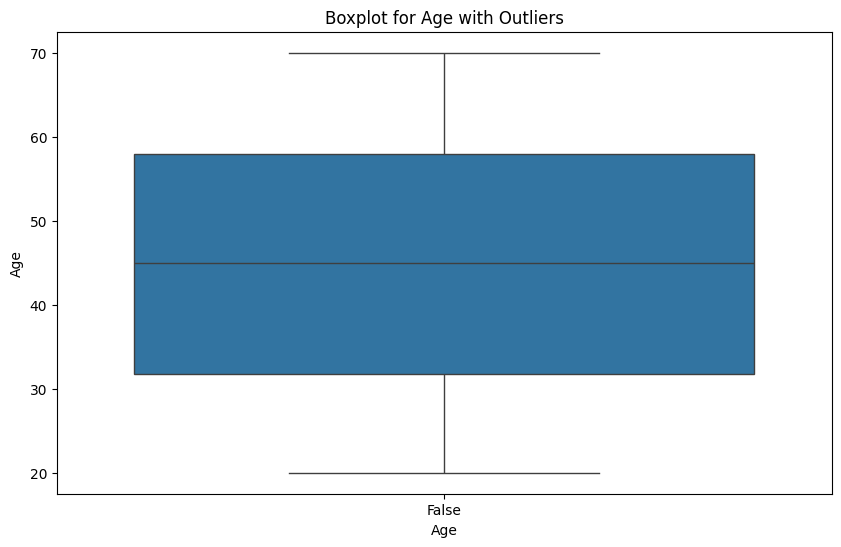

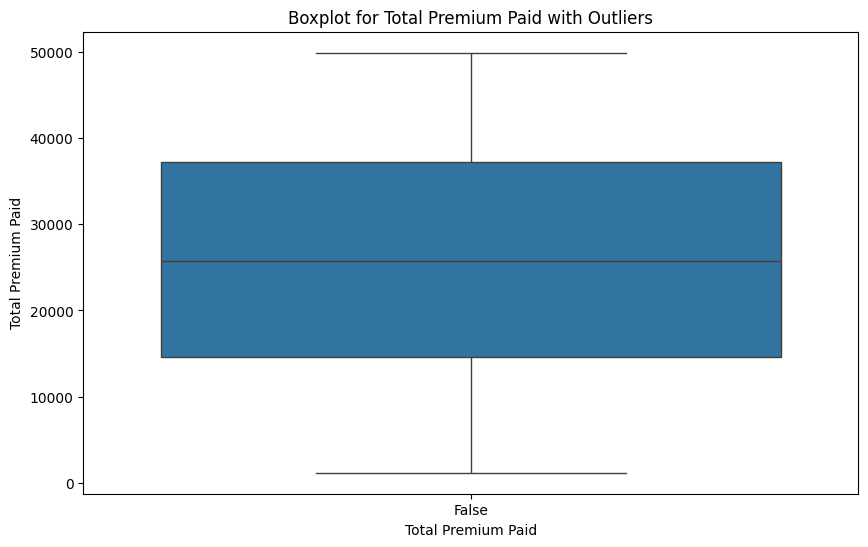

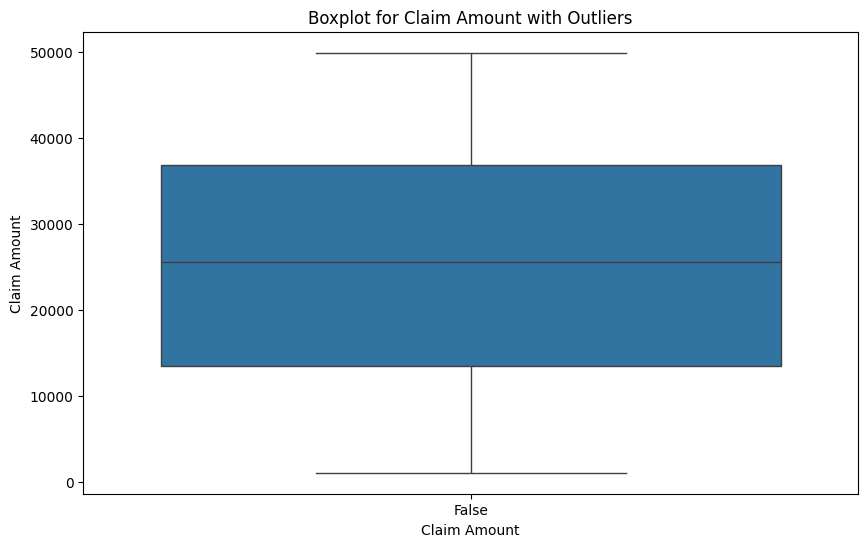

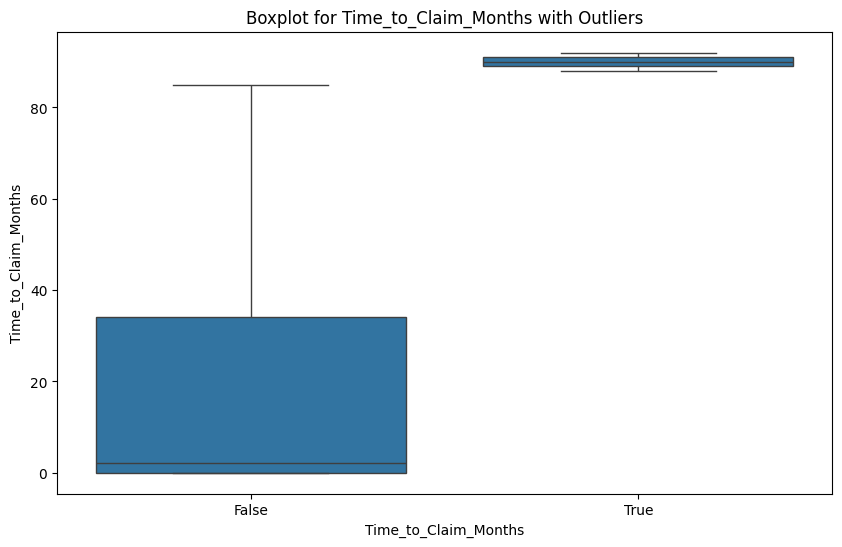

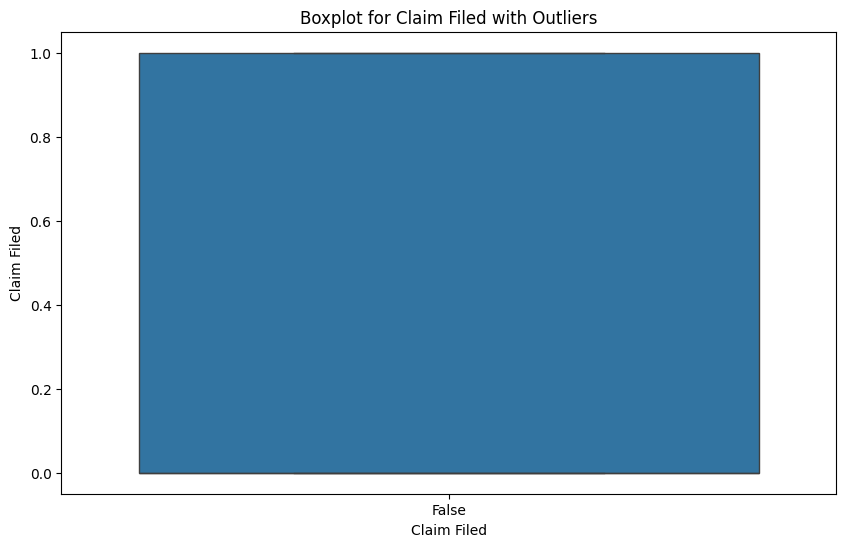

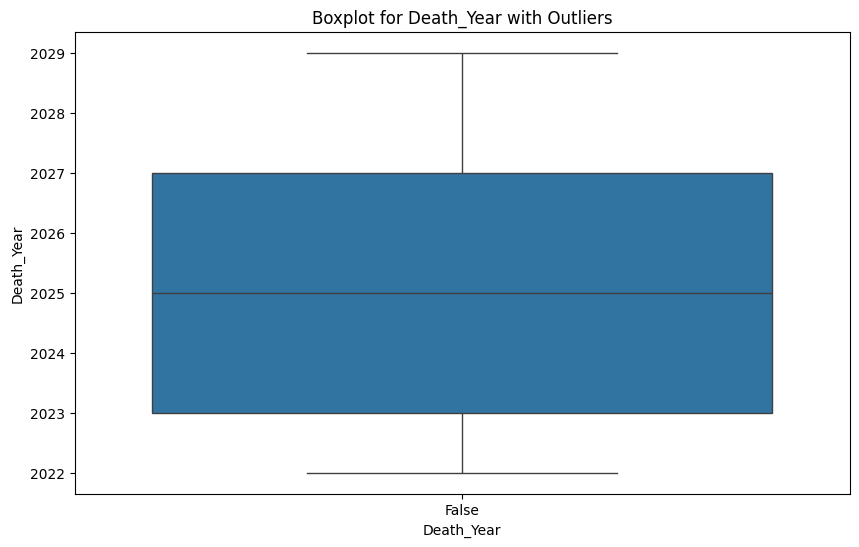

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to find outliers in a column
def find_outliers(column):
    if pd.api.types.is_numeric_dtype(column):
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = (column < lower_bound) | (column > upper_bound)
        return outliers
    else:
        return pd.Series(False, index=column.index)

# Remove duplicate rows
df = df[~df.duplicated()]

# Detect outliers for each column
outliers_per_column = df.apply(find_outliers)

# Create boxplots for numeric columns with outliers
for column in outliers_per_column.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=outliers_per_column[column], y=df[column])
        plt.title(f"Boxplot for {column} with Outliers")
        plt.show()


In [16]:
X = df.drop(['Claim Filed'],axis=1)

In [17]:
y = df["Claim Filed"]

In [18]:
def one_hot_encode_columns(X, columns):
    df_encoded = pd.get_dummies(X, columns=columns, drop_first=True)
    df_encoded = df_encoded.astype(int)
    return df_encoded

columns_to_encode = ["Policy Type", "Cause of Death", "Gender", "Occupation", "Beneficiary Relationship", "Health Status", "Pre-existing Conditions", "Disbursement Method"]

df_encoded = one_hot_encode_columns(X, columns_to_encode)

# Drop the original columns that were one-hot encoded
X = X.drop(columns=columns_to_encode)

# Concatenate the original DataFrame with the one-hot encoded DataFrame
X = pd.concat([X, df_encoded], axis=1)


In [19]:
X.head()

,Age,Total Premium Paid,Claim Amount,Time_to_Claim_Months,Death_Year,Age,Total Premium Paid,Claim Amount,Time_to_Claim_Months,Death_Year,...,Beneficiary Relationship_Friend,Beneficiary Relationship_Parent,Beneficiary Relationship_Sibling,Beneficiary Relationship_Spouse,Health Status_Good,Health Status_Poor,Pre-existing Conditions_Cancer,Pre-existing Conditions_Diabetes,Pre-existing Conditions_Hypertension,Disbursement Method_Lump sum
0,27,43655,12472,0,2028,27,43655,12472,0,2028,...,0,0,1,0,1,0,1,0,0,0
1,55,18367,10647,23,2027,55,18367,10647,23,2027,...,0,0,0,1,1,0,1,0,0,0
2,67,28942,21029,0,2026,67,28942,21029,0,2026,...,0,0,0,1,1,0,0,0,1,0
3,32,45614,21118,20,2023,32,45614,21118,20,2023,...,0,0,0,0,1,0,0,0,0,0
4,40,44543,13514,6,2025,40,44543,13514,6,2025,...,1,0,0,0,0,1,0,0,0,1


In [20]:
X = X.loc[:, ~X.columns.duplicated()]


In [21]:
X.columns.tolist()

['Age',
 'Total Premium Paid',
 'Claim Amount',
 'Time_to_Claim_Months',
 'Death_Year',
 'Policy Type_Universal Life',
 'Policy Type_Whole Life',
 'Cause of Death_Illness',
 'Cause of Death_Natural Causes',
 'Gender_Male',
 'Occupation_Lawyer',
 'Occupation_Nurse',
 'Occupation_Software Engineer',
 'Occupation_Teacher',
 'Beneficiary Relationship_Friend',
 'Beneficiary Relationship_Parent',
 'Beneficiary Relationship_Sibling',
 'Beneficiary Relationship_Spouse',
 'Health Status_Good',
 'Health Status_Poor',
 'Pre-existing Conditions_Cancer',
 'Pre-existing Conditions_Diabetes',
 'Pre-existing Conditions_Hypertension',
 'Disbursement Method_Lump sum']

In [22]:
y_corr = df[["Claim Filed"]]

In [23]:
print(X.columns[X.columns.duplicated()])


Index([], dtype='object')


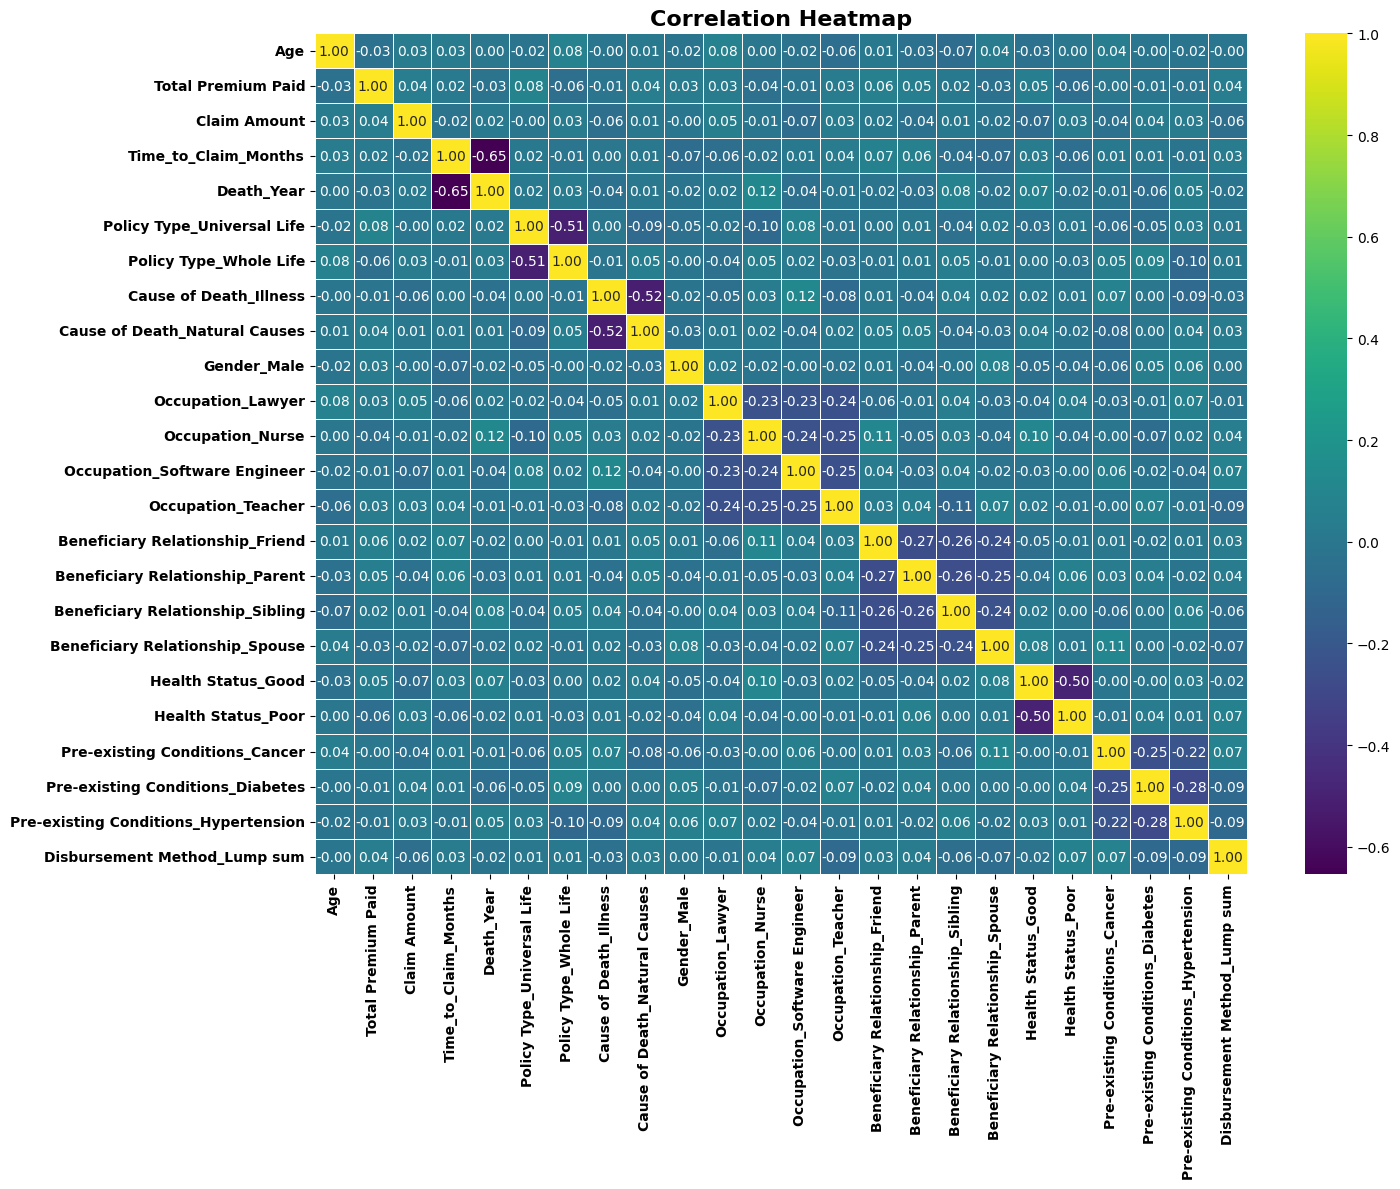

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = X.corr()

column_correlations = correlation_matrix[y_corr]

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()


In [25]:
X.columns.tolist()

['Age',
 'Total Premium Paid',
 'Claim Amount',
 'Time_to_Claim_Months',
 'Death_Year',
 'Policy Type_Universal Life',
 'Policy Type_Whole Life',
 'Cause of Death_Illness',
 'Cause of Death_Natural Causes',
 'Gender_Male',
 'Occupation_Lawyer',
 'Occupation_Nurse',
 'Occupation_Software Engineer',
 'Occupation_Teacher',
 'Beneficiary Relationship_Friend',
 'Beneficiary Relationship_Parent',
 'Beneficiary Relationship_Sibling',
 'Beneficiary Relationship_Spouse',
 'Health Status_Good',
 'Health Status_Poor',
 'Pre-existing Conditions_Cancer',
 'Pre-existing Conditions_Diabetes',
 'Pre-existing Conditions_Hypertension',
 'Disbursement Method_Lump sum']

In [26]:
y

0      0
1      0
2      0
3      0
4      1
      ..
495    0
496    0
497    1
498    1
499    0
Name: Claim Filed, Length: 500, dtype: int64

### Data Split

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
LR_model = LogisticRegression()

# Train the model
LR_model.fit(X_train, y_train)

# Use the trained model to make predictions on the training and test sets
y_pred_train_LR = LR_model.predict(X_train)
y_pred_test_LR = LR_model.predict(X_test)

# Print classification reports for training and test sets
print("Training Set Classification Report:\n", classification_report(y_train, y_pred_train_LR))
print("Testing Set Classification Report:\n", classification_report(y_test, y_pred_test_LR))


Training Set Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87       287
           1       0.72      0.47      0.57       113

    accuracy                           0.80       400
   macro avg       0.77      0.70      0.72       400
weighted avg       0.79      0.80      0.78       400

Testing Set Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87        72
           1       0.70      0.50      0.58        28

    accuracy                           0.80       100
   macro avg       0.76      0.71      0.73       100
weighted avg       0.79      0.80      0.79       100



### SVM Model

In [31]:
SVM_model = SVC()

In [32]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1],
}

# Create the grid search object
grid_search = GridSearchCV(SVM_model, param_grid, cv=5, scoring='accuracy')

# Perform the grid search on your training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions on the test set
y_pred_train_SVM = grid_search.predict(X_train)
y_pred_test_SVM = grid_search.predict(X_test)



print("training Set classification_report: \n",classification_report(y_train, y_pred_train_SVM))
print("testing Set classification_report: \n",classification_report(y_test, y_pred_test_SVM))

Best Hyperparameters: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
training Set classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       287
           1       1.00      0.99      1.00       113

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

testing Set classification_report: 
               precision    recall  f1-score   support

           0       0.94      0.88      0.91        72
           1       0.73      0.86      0.79        28

    accuracy                           0.87       100
   macro avg       0.83      0.87      0.85       100
weighted avg       0.88      0.87      0.87       100



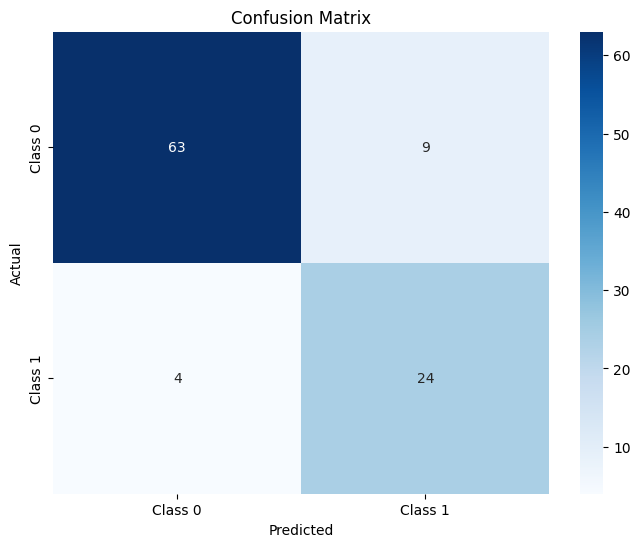

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix


conf_matrix = confusion_matrix(y_test, y_pred_test_SVM)



# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# TN FP
# FN TP

###  KNN_model

In [34]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7],
    'metric': ['euclidean', 'manhattan']
}


grid_search = GridSearchCV(KNN_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Access the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)


# Use the best model to make predictions on the test set
y_pred_train_KNN = grid_search.predict(X_train)
y_pred_test_KNN = grid_search.predict(X_test)



print("training Set classification_report: \n",classification_report(y_train, y_pred_train_KNN))
print("testing Set classification_report: \n",classification_report(y_test, y_pred_test_KNN))

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 7}
training Set classification_report: 
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       287
           1       0.90      0.49      0.63       113

    accuracy                           0.84       400
   macro avg       0.87      0.73      0.76       400
weighted avg       0.85      0.84      0.82       400

testing Set classification_report: 
               precision    recall  f1-score   support

           0       0.80      0.93      0.86        72
           1       0.69      0.39      0.50        28

    accuracy                           0.78       100
   macro avg       0.74      0.66      0.68       100
weighted avg       0.77      0.78      0.76       100



#### Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Create a Random Forest model
RF_model = RandomForestClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(RF_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Access the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)

# Use the best model to make predictions on the training and test sets
y_pred_train_RF = grid_search.predict(X_train)
y_pred_test_RF = grid_search.predict(X_test)

# Print classification reports for training and test sets
print("Training Set Classification Report:\n", classification_report(y_train, y_pred_train_RF))
print("Testing Set Classification Report:\n", classification_report(y_test, y_pred_test_RF))


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Training Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       287
           1       1.00      1.00      1.00       113

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Testing Set Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93        72
           1       0.90      0.68      0.78        28

    accuracy                           0.89       100
   macro avg       0.90      0.83      0.85       100
weighted avg       0.89      0.89      0.88       100

